In [1]:
import tqdm
import tensorflow as tf
from models.model import *
from utils.lr_shcedulers import LR_scheduler
from utils.data_utils import DataLoader
from utils.eval_utils import Eval
from utils.io_utils import read_cfg, Logger
import cv2
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cfg = read_cfg()

epochs = cfg['train']['epochs']
warmup_epochs = cfg['train']['warmup_epochs']
train_checkpoint = cfg['model']['train_checkpoint']
loss_checkpoint = cfg['model']['loss_checkpoint']
map_checkpoint = cfg['model']['map_checkpoint']
cfg['model']['input_size'] = np.array([512, 512])
cfg['anchors'] = np.array([1])

1 Physical GPUs, 1 Logical GPUs


In [3]:
dataloader = DataLoader(cfg)

In [4]:
dataset = dataloader('train', augmentation=True)

Dataset: custom train
./data/custom/train.tfrecord is exist


In [5]:
data = []
for e in range(5):
    for i, d in enumerate(dataset):
        if i==0:
            data += [[d[0][0], d[1][d[1][..., 0]==0]]]

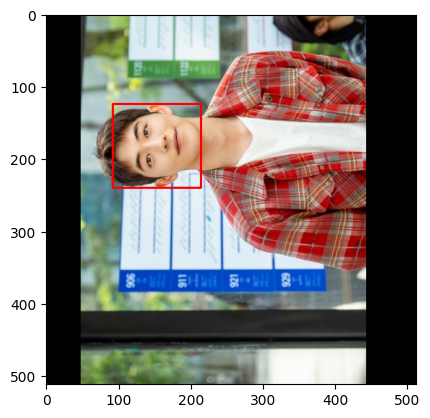

In [6]:
# for image, labels in data:
image, labels = data[0]

image = (image*255).numpy().astype(np.uint8)
labels = labels.numpy()
for b,x,y,w,h,c in labels:
    x1 = (x-w/2).astype(np.int32)
    y1 = (y-h/2).astype(np.int32)
    x2 = (x+w/2).astype(np.int32)
    y2 = (y+h/2).astype(np.int32)
    cv2.rectangle(image, [x1, y1], [x2, y2], [255,0,0], 2)

plt.imshow(image)
plt.show()

In [22]:
len(data[0])

512